# Importing Libraries and data

In [22]:
import pandas as pd
import numpy as np

In [23]:
dataframe=pd.read_csv('train_v2.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
dataframe.head()

,Store ID,DayOfWeek,Date,Sales,Customers ID,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,1/30/2015,5577,616,1,1,0,0
1,2,5,1/30/2015,5919,624,1,1,0,0
2,3,5,1/30/2015,6911,678,1,1,0,0
3,4,5,1/30/2015,13307,1632,1,1,0,0
4,5,5,1/30/2015,5640,617,1,1,0,0


In [25]:
holiday_map={'0':0,'a':1,'c':2}
dataframe.StateHoliday=dataframe.StateHoliday.map(holiday_map)

In [26]:
dataframe.shape


(66900, 9)

In [27]:
dataframe.head()

,Store ID,DayOfWeek,Date,Sales,Customers ID,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,1/30/2015,5577,616,1,1,0.0,0
1,2,5,1/30/2015,5919,624,1,1,0.0,0
2,3,5,1/30/2015,6911,678,1,1,0.0,0
3,4,5,1/30/2015,13307,1632,1,1,0.0,0
4,5,5,1/30/2015,5640,617,1,1,0.0,0


In [28]:
dataframe.columns

Index(['Store ID', 'DayOfWeek', 'Date', 'Sales', 'Customers ID', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [29]:
dataframe.StateHoliday.fillna(value=0.0,inplace=True)

In [30]:
dataframe.isnull().sum()

Store ID         0
DayOfWeek        0
Date             0
Sales            0
Customers ID     0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [31]:
features_cols=['Customers ID','Open','Promo','StateHoliday','SchoolHoliday']

In [32]:
respons_col=['Sales']

In [33]:
import seaborn as sns
%matplotlib inline

# Visualizing the relation between Features columns and Respons column using scaterplot

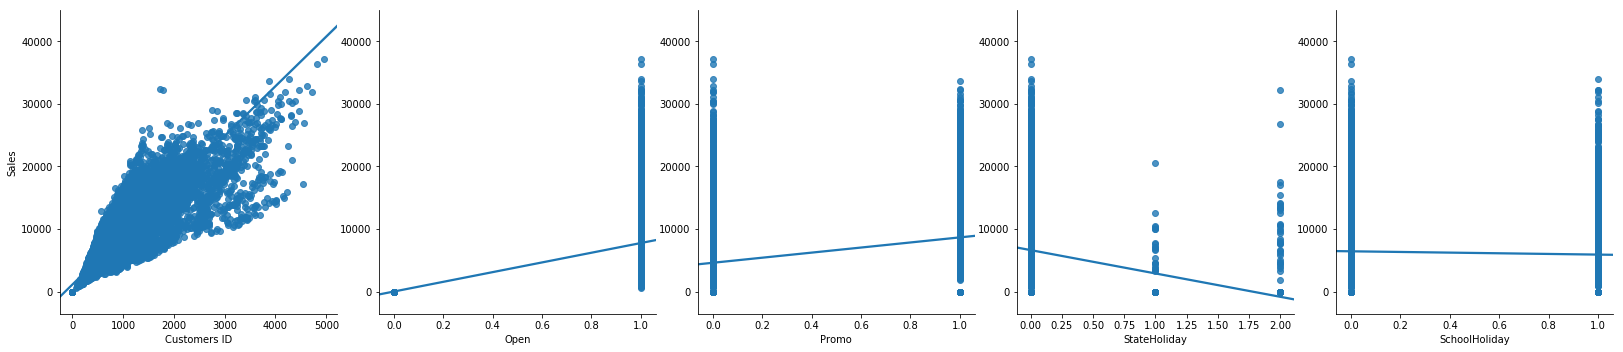

In [34]:
sns.pairplot(dataframe,x_vars=features_cols,y_vars=respons_col,size=5,aspect=0.9,kind='reg')

In [35]:
X=dataframe[features_cols]

In [36]:
X.head()

,Customers ID,Open,Promo,StateHoliday,SchoolHoliday
0,616,1,1,0.0,0
1,624,1,1,0.0,0
2,678,1,1,0.0,0
3,1632,1,1,0.0,0
4,617,1,1,0.0,0


In [37]:
X.groupby(['StateHoliday']).count()

,Customers ID,Open,Promo,SchoolHoliday
StateHoliday,,,,
0.0,63642,63642,63642,63642
1.0,1388,1388,1388,1388
2.0,1870,1870,1870,1870


In [38]:
X.groupby(['SchoolHoliday']).count()

,Customers ID,Open,Promo,StateHoliday
SchoolHoliday,,,,
0,54829,54829,54829,54829
1,12071,12071,12071,12071


In [39]:
X.SchoolHoliday.count()

66900

In [40]:
X.StateHoliday.count()

66900

In [41]:
y=dataframe[respons_col]

In [42]:
y.head()

,Sales
0,5577
1,5919
2,6911
3,13307
4,5640


In [43]:
from sklearn.cross_validation import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

# Modeling

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
Lr=LinearRegression()

In [47]:
Lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
y_predict=Lr.predict(X_test)

In [49]:
y_predict

array([[ 6383.34774948],
       [ 6704.15449265],
       [ 5059.91987572],
       ..., 
       [ 6657.60175337],
       [ 9123.30897556],
       [  -32.26503657]])

In [50]:
print(Lr.intercept_)

[-32.26503657]


In [51]:
print(Lr.coef_)

[[    6.65039133  1607.37985777  1378.21896391  -336.80362305   529.7135603 ]]


# computing RMSE prediction for our prediction

In [52]:
import numpy as np
from sklearn import metrics
print (np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

1623.32690598


# It looks preety good that our Root Mean Squred Error is "1631" which is very small with compare to actula sales amount , this error can be minimize be anlayzise data more better :) 

In [53]:
# now training our Model with whole data set

In [54]:
Lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
test_dataframe=pd.read_csv('test_v2.csv')

In [56]:
test_dataframe.isnull().sum()

Store ID         0
DayOfWeek        0
Date             0
Customers ID     0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [57]:
test_dataframe.columns

Index(['Store ID', 'DayOfWeek', 'Date', 'Customers ID', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [58]:
test_dataframe.StateHoliday.count()

33450

In [59]:
test_dataframe['Customers ID']

0         555
1         625
2         821
3        1498
4         559
5         589
6        1414
7         833
8         687
9         681
10       1236
11        962
12        568
13        710
14        766
15        979
16        946
17        936
18        718
19        974
20        682
21        633
22        560
23       1082
24       1586
25        611
26       1263
27        663
28        737
29        625
         ... 
33420     786
33421     661
33422     474
33423     973
33424     834
33425     738
33426    1007
33427     903
33428     350
33429     656
33430     631
33431    3070
33432     690
33433    1208
33434     567
33435    1011
33436     676
33437     410
33438     420
33439     511
33440     580
33441     625
33442     667
33443     424
33444     626
33445     329
33446     577
33447     793
33448    3784
33449     452
Name: Customers ID, Length: 33450, dtype: int64

In [60]:
test_dataframe.groupby(['StateHoliday']).count()

,Store ID,DayOfWeek,Date,Customers ID,Open,Promo,SchoolHoliday
StateHoliday,,,,,,,
0,33450,33450,33450,33450,33450,33450,33450


In [61]:
test_dataframe.describe

<bound method NDFrame.describe of        Store ID  DayOfWeek       Date  Customers ID  Open  Promo  \
0             1          5  7/31/2015           555     1      1   
1             2          5  7/31/2015           625     1      1   
2             3          5  7/31/2015           821     1      1   
3             4          5  7/31/2015          1498     1      1   
4             5          5  7/31/2015           559     1      1   
5             6          5  7/31/2015           589     1      1   
6             7          5  7/31/2015          1414     1      1   
7             8          5  7/31/2015           833     1      1   
8             9          5  7/31/2015           687     1      1   
9            10          5  7/31/2015           681     1      1   
10           11          5  7/31/2015          1236     1      1   
11           12          5  7/31/2015           962     1      1   
12           13          5  7/31/2015           568     1      1   
13           1

In [62]:
X1_test=test_dataframe[features_cols]

In [63]:
X1_test.head()

,Customers ID,Open,Promo,StateHoliday,SchoolHoliday
0,555,1,1,0,1
1,625,1,1,0,1
2,821,1,1,0,1
3,1498,1,1,0,1
4,559,1,1,0,1


In [64]:
y_predict_class=Lr.predict(X1_test)

In [65]:
y_predict_class.shape

(33450, 1)

In [66]:
y_predict_class

array([[  7174.30061672],
       [  7638.43823003],
       [  8938.0235473 ],
       ..., 
       [  8217.0429073 ],
       [ 28048.98007032],
       [  5956.02967674]])

In [67]:
y_predict_class=y_predict_class.reshape(y_predict_class.shape[0])

In [68]:
y_predict_class.shape

(33450,)

In [71]:
pd.DataFrame({'Store ID':test_dataframe['Store ID'],'Sales':y_predict_class}).set_index('Store ID').to_csv('output1.csv')